#  Cats vs Dogs Image Classification (CNN)

This notebook demonstrates an end-to-end **Convolutional Neural Network (CNN)**
for binary image classification using **TensorFlow & Keras**.

###  Objectives
- Build a CNN model from scratch
- Load image data from disk using ImageDataGenerator
- Understand **overfitting** in CNNs
- Evaluate model performance visually

###  Use Case
This project is designed for:
- Beginners in Computer Vision
- Educational purposes
- Portfolio demonstration


## Imports & Environment Setup

In [25]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
import numpy as np
import matplotlib.pyplot as plt
import logging

# Reduce TensorFlow logging
tf.get_logger().setLevel(logging.ERROR)

print("TensorFlow version:", tf.__version__)

# We suppress TensorFlow warnings to keep outputs clean and readable.

TensorFlow version: 2.19.0


## Dataset Download & Structure

In [26]:
_URL = 'https://download.mlcc.google.com/mledu-datasets/cats_and_dogs_filtered.zip'
zip_path = tf.keras.utils.get_file(
    'cats_and_dogs_filtered.zip',
    origin=_URL,
    extract=True
)

base_dir = os.path.join(os.path.dirname(zip_path), 'cats_and_dogs_filtered')


### Dataset Structure


The dataset we have downloaded has the following directory structure.

<pre style="font-size: 10.0pt; font-family: Arial; line-height: 2; letter-spacing: 1.0pt;" >
<b>cats_and_dogs_filtered</b>
|__ <b>train</b>
    |______ <b>cats</b>: [cat.0.jpg, cat.1.jpg, cat.2.jpg ...]
    |______ <b>dogs</b>: [dog.0.jpg, dog.1.jpg, dog.2.jpg ...]
|__ <b>validation</b>
    |______ <b>cats</b>: [cat.2000.jpg, cat.2001.jpg, cat.2002.jpg ...]
    |______ <b>dogs</b>: [dog.2000.jpg, dog.2001.jpg, dog.2002.jpg ...]
</pre>



In [27]:
print("ZIP PATH:", zip_path)
print("BASE DIR CONTENTS:")
print(os.listdir(os.path.dirname(zip_path)))

ZIP PATH: /root/.keras/datasets/cats_and_dogs_filtered_extracted
BASE DIR CONTENTS:
['cats_and_dogs_filtered_extracted', 'cats_and_dogs_filtered.zip']


### Data Exploration (Counts + Interpretation)

In [28]:
def count_images(directory):
    return len(os.listdir(directory))

dataset_root = "/root/.keras/datasets/cats_and_dogs_filtered_extracted/cats_and_dogs_filtered"

train_dir = os.path.join(dataset_root, 'train')
val_dir   = os.path.join(dataset_root, 'validation')



print("Training Cats:", count_images(os.path.join(train_dir, 'cats')))
print("Training Dogs:", count_images(os.path.join(train_dir, 'dogs')))
print("Validation Cats:", count_images(os.path.join(val_dir, 'cats')))
print("Validation Dogs:", count_images(os.path.join(val_dir, 'dogs')))


Training Cats: 1000
Training Dogs: 1000
Validation Cats: 500
Validation Dogs: 500


### Hyperparameters

In [29]:
BATCH_SIZE = 32
IMG_SIZE = (150, 150)
EPOCHS = 30

### Data Generators

In [30]:
train_gen = ImageDataGenerator(rescale=1./255)
val_gen   = ImageDataGenerator(rescale=1./255)

train_data = train_gen.flow_from_directory(
    train_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary',
    shuffle=True
)

val_data = val_gen.flow_from_directory(
    val_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary',
    shuffle=False
)


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


### Visualizing Samples

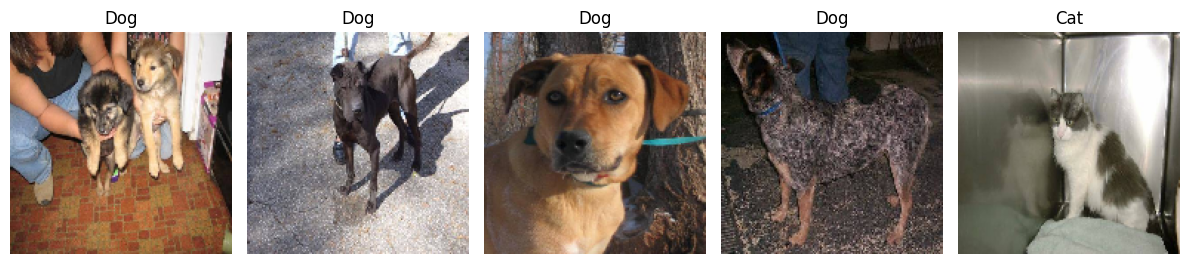

In [31]:
def show_and_save_images(images, labels, save_path="sample_training_images.png"):
    plt.figure(figsize=(12, 5))
    
    for i in range(5):
        plt.subplot(1, 5, i+1)
        plt.imshow(images[i])
        plt.title("Dog" if labels[i] else "Cat")
        plt.axis("off")
    
    plt.tight_layout()
    plt.savefig(save_path, dpi=300, bbox_inches="tight")
    plt.show()
    
images, labels = next(train_data)
show_and_save_images(images, labels)

## Model Architecture

In [32]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, 3, activation='relu', input_shape=(*IMG_SIZE, 3)),
    tf.keras.layers.MaxPooling2D(),

    tf.keras.layers.Conv2D(64, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),

    tf.keras.layers.Conv2D(128, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])


## Compile & Train

In [33]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 36992)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 512)            │    18,940,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 19,034,177 (72.61 MB)

 Trainable params: 19,034,177 (72.61 MB)

 Non-trainable params: 0 (0.00 B)

In [34]:
history = model.fit(
    train_data,
    epochs=EPOCHS,
    validation_data=val_data
)


Epoch 1/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 8s 94ms/step - accuracy: 0.5272 - loss: 1.0226 - val_accuracy: 0.5000 - val_loss: 0.6904
Epoch 2/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 4s 60ms/step - accuracy: 0.5191 - loss: 0.6931 - val_accuracy: 0.6430 - val_loss: 0.6781
Epoch 3/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 4s 62ms/step - accuracy: 0.5866 - loss: 0.6720 - val_accuracy: 0.6250 - val_loss: 0.6457
Epoch 4/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 4s 60ms/step - accuracy: 0.6629 - loss: 0.6244 - val_accuracy: 0.6300 - val_loss: 0.6696
Epoch 5/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 4s 61ms/step - accuracy: 0.7305 - loss: 0.5175 - val_accuracy: 0.6760 - val_loss: 0.6175
Epoch 6/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 4s 61ms/step - accuracy: 0.7858 - loss: 0.4520 - val_accuracy: 0.7170 - val_loss: 0.5836
Epoch 7/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 4s 61ms/step - accuracy: 0.8377 - loss: 0.3552 - val_accuracy: 0.7050 - val_loss: 0.7192
Epoch 8/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 4s 63ms/step - accuracy: 0.9095 - loss: 0.2269 - val_accuracy: 0.7120 - v

## Training Curves

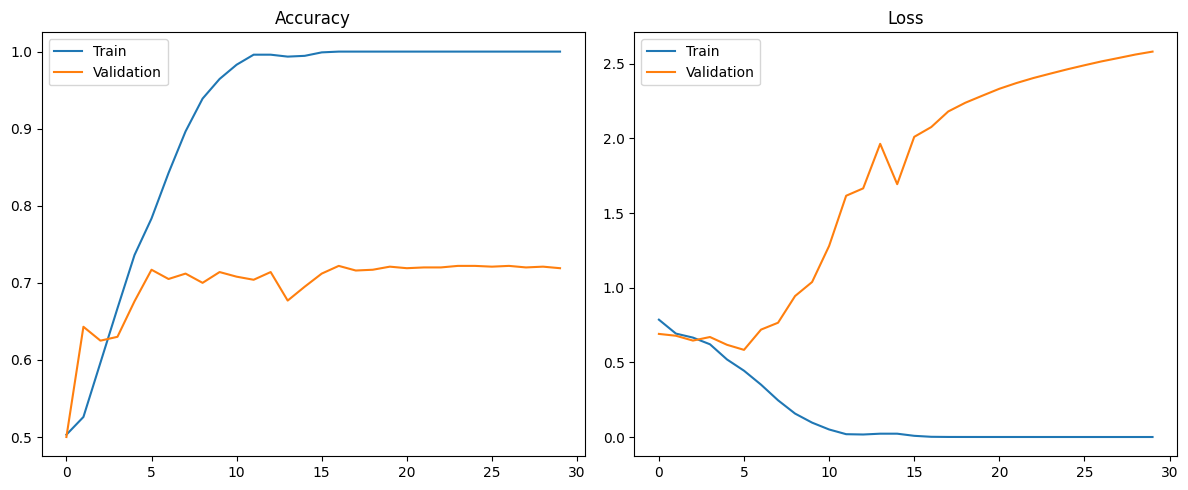

In [35]:
def plot_and_save_history(history, save_path="training_curves.png"):
    plt.figure(figsize=(12,5))

    plt.subplot(1,2,1)
    plt.plot(history.history['accuracy'], label='Train')
    plt.plot(history.history['val_accuracy'], label='Validation')
    plt.title('Accuracy')
    plt.legend()

    plt.subplot(1,2,2)
    plt.plot(history.history['loss'], label='Train')
    plt.plot(history.history['val_loss'], label='Validation')
    plt.title('Loss')
    plt.legend()

    plt.tight_layout()
    plt.savefig(save_path, dpi=300)
    plt.show()
plot_and_save_history(history)


## Final Section: Conclusion
##  Conclusion

- CNNs can learn visual patterns effectively
- Overfitting is common with small datasets
- Data augmentation and regularization are recommended improvements

###  Next Steps
- Add Image Augmentation
- Use Transfer Learning (MobileNetV2)
- Save & load trained model
